#OA3802 Lab 1: Twitter Sentiment Analysis
###Travis Farwell
##Task 1
Task 1 asks to identify the top 5 hashtags from a sample of tweets that were scraped using the Tweepy API. The plot_top_hashes function uses a helper function named get_tweets that takes as input a file in json format of sample tweets. The function then uses the raw text of each tweet and to search for all hash tags using a regular expression. Each hashtag is appended to a list and then converted to a dataframe. Using the value_counts pandas dataframe method, the top 5 hashtags are printed and then output as a barchart.

MPN             45
KCAArgentina    25
ร               19
워너원             16
Empire          13
Name: 0, dtype: int64


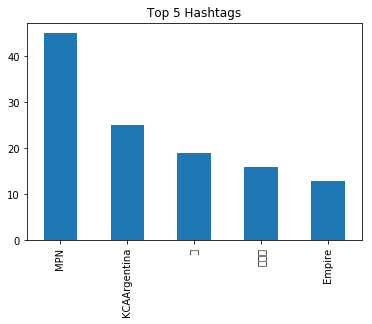

In [1]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Function that returns list of tweet data
def get_tweets(file = "SampleData.txt"):
    tweet_file = open(file, "r")
    tweets_data = [] 
    for line in tweet_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
    return tweets_data

def plot_top_hashes(file = "SampleData.txt"):
    
    tweets_data = get_tweets(file)
    hash_list = []

    for i in range(len(tweets_data)):
      try:
        #print(tweets_data[i]['text'])
        temp_list = re.findall(r"#(\w+)",tweets_data[i]['text'] )
        if len(temp_list) > 0:
          #print(temp_list)
          hash_list.append(temp_list)
      except:
        continue
        
    word_dict = {}
    word_list = []
    for i in range(len(hash_list)):
      for j in range(len(hash_list[i])):
        if hash_list[i][j] in word_dict:
            word_dict[hash_list[i][j]] += 1
            word_list.append(hash_list[i][j])
        else:
            word_dict[hash_list[i][j]] = 1
            word_list.append(hash_list[i][j])
    #print(word_dict) 

    df = pd.DataFrame(word_list)
    df.head()
    series = df[0].value_counts()[:5]
    print(series.head(5))
    series.plot(kind='bar', title = "Top 5 Hashtags")
    
plot_top_hashes()



##Task 2
This task asks to find the sentiment of each tweet in the sample. The sentiment uses a file with scores for approximately 1600 words with a value of -3 to 3. Each tweet will be split up into a list of words to compute the sentiment. I've decided to extract all punctuation so that strings including these characters will be converted to only letters. Each word will also be converted to lowercase. I've decided to leave retweets since the sample is large enough and retweets are still tweets.  The function loops through every tweet and evaluates the raw text and computes a sentiment even if the text is empty. A try/except block is used to avoid errors due to empty strings. The function returns a list of lists which are the words of each tweet and a list of sentiment scores matching to the list of words by index both of length equal to the number of lines in the sample tweet file.

In [2]:
def tweet_sentiment(file = "SampleData.txt", new_words = {}):
    afinnfile = open("AFINN-111.txt")
    scores = {} # initialize an empty dictionary
    for line in afinnfile:
        term, score  = line.split("\t")  # The file is tab-delimited. "\t" means "tab character"
        scores[term] = int(score)  # Convert the score to an integer.
    scores = { **new_words,**scores}
    sentiment = []
    words_list = []
    tweets_data = get_tweets(file)
    #print(scores.items()) # Print every (term, score) pair in the dictionary
    for i in range(len(tweets_data)):
      try:
        #print(tweets_data[i]['text'])
        text = tweets_data[i]['text']
        text = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", '', text)
        text = str.lower(text)
        words = text.split()
        words_list.append(words)
        sen = 0
        for j in range(len(words)):
            try:
                sen += scores[str.lower(words[j])]
            except:
                continue
        sentiment.append(sen)
      except:
        sentiment.append(0)
        words_list.append([])
        continue
    return words_list,sentiment

The below block of code prints out the tweet and sentiment of the first 10 tweets with raw text skipping over the empty values.

In [3]:
tweets_data = get_tweets()
words_list,sentiment = tweet_sentiment()
i = 0
j = 0
while j < 10:
    try:
        print("Text: ", tweets_data[i]['text'])
        print("Sentiment: ", sentiment[i])
        j += 1
        i += 1
    except:
        i += 1
        continue
    


Text:  RT @UnDixionario: https://t.co/8RZpLMOPd2
Sentiment:  0
Text:  لا تسبق غيرك اسبق نفسك في كل سنة اصدر نسخة جديدة منك أفضل من السنة التي قبلها ، نسخة أبهى و أجمل لكن حافظ على أصالة روحك.
Sentiment:  0
Text:  RT @ruba030: @bxshra75 @samah_3mmari ما انحرمش ☹️❤️❤️❤️
Sentiment:  0
Text:  RT @shadyhussien: مساء الخير...هو احنا ممكن نعمل pause للجو كدة علطول ؟
Sentiment:  0
Text:  RT @ANIABELLO_R: ¿Quien mintió? https://t.co/YkWZSfxgRZ
Sentiment:  0
Text:  Benja me dijo que se cambia de cole, y me la re bajo 💔👎
Sentiment:  0
Text:  RT @TrillPyrvmids: let situations evolve at their own pace
Sentiment:  0
Text:  RT @tragueiverdades: Azeite extra virgem https://t.co/WhyHTvT671
Sentiment:  0
Text:  RT @TrillPyrvmids: let situations evolve at their own pace
Sentiment:  0
Text:  I'm sorry penguins I forgot to wear my game day socks u deserve better from me
Sentiment:  1


##Task 3
This task adds sentiment values for new words from a set of sample tweets. It first calls the tweet_sentiment function and stores the words in a list of lists and a list of sentiment values. Then for each word the function adds the value of the tweet's sentiment value to a dictionary where the key is the word and the value is a list containing the values of sentiment for each tweet that the word occurs. After going through all words in each tweet the lists are averaged and this value becomes the sentiment value for the corresponding word. 

In [6]:
def new_sentiment_engine(oldtweets = "SampleData.txt"):
    words_list,sentiment = tweet_sentiment(oldtweets)
    new_words = {}
    for i in range(len(sentiment)):
        for j in range(len(words_list[i])):
            key = words_list[i][j]
            value = sentiment[i] 
            if key in new_words:
                new_words[key].append(value)
            else:
                new_words[key] = [value]
    for key in new_words:
        new_words[key] = sum(new_words[key])/len(new_words[key])
    return new_words

##Task 4
The final task scrapes for tweets that have a particular hastag. I chose #NFL since there seems to be mixed sentiment around the current actions of players not standing during the playing of the National Anthem. I let the scraper run for about 2 hours to make sure I captured a lot of tweets. First, the list of new word values is obtained from the original sample data. Then this is passed to the tweet_sentiment function along with the new nfl tweet data. The returned values are the words of each nfl tweet broken up and each tweets sentiment. The histogram of the tweet sentiments looks to be fairly normal but I see heavier sentiment in the negative values possibly indicating anti-sentiment towards the NFL and this ongoing controversy. 

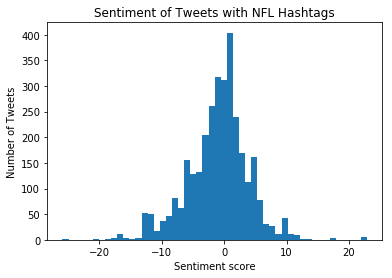

In [7]:
new_words_dict = new_sentiment_engine()
words_list, sentiment = tweet_sentiment("nflData.txt", new_words_dict)
plt.hist(sentiment, bins=50)
plt.title("Sentiment of Tweets with NFL Hashtags")
plt.ylabel("Number of Tweets")
plt.xlabel("Sentiment score")
plt.show()